In [1]:
import pickle
import glob
import os
import healpy as hp
import numpy as np
from matplotlib import pyplot as plt
import qubic
from qubic import AnalysisMC as amc
from qubic import QubicSkySim as qss
from pysimulators.interfaces.healpy import HealpixConvolutionGaussianOperator
%matplotlib inline

In [2]:
thedir = '/home/oem/CMM-Pipeline/src/'
dic_name = '**.pkl'
spectra = np.sort(glob.glob(thedir + dic_name))

for i in range(len(spectra)):
    print(i, spectra[i])

0 /home/oem/CMM-Pipeline/src/autospectrum_foldertest_1_seed1.pkl


In [3]:
real = spectra[0]
map_dict = pickle.load(open(real,'rb'))

print(map_dict.keys())

dict_keys(['ell', 'Dl', 'Dl_1x1', 'Dl_2x2', 'Dl_1x2'])


In [4]:
ell = map_dict['ell']
print(ell)
print(map_dict['Dl'].shape)
print(map_dict['Dl'][0,1,:])
print(map_dict['Dl_2x2'][0,:])
# print(map_dict['Dl'][0,0,0]-map_dict['Dl_1x1'][0,0])
# print(map_dict['Dl'][0,0,1]-map_dict['Dl_1x1'][0,1])

[ 54.5  84.5 114.5 144.5 174.5 204.5 234.5 264.5 294.5 324.5 354.5 384.5
 414.5 444.5 474.5 500. ]
(50, 2, 16)
[0.07202593 0.06821235 0.07264632 0.06707787 0.10397432 0.13853812
 0.11889692 0.22312338 0.18635342 0.26790119 0.24286795 0.26301139
 0.3436569  0.41264742 0.46884945 0.55765258]
[0.00478864 0.00738379 0.02251304 0.02230666 0.04334072 0.07756432
 0.09010098 0.12085008 0.12490672 0.19579044 0.20346052 0.21593485
 0.26501132 0.36887213 0.41985262 0.49871042]


(50, 16)


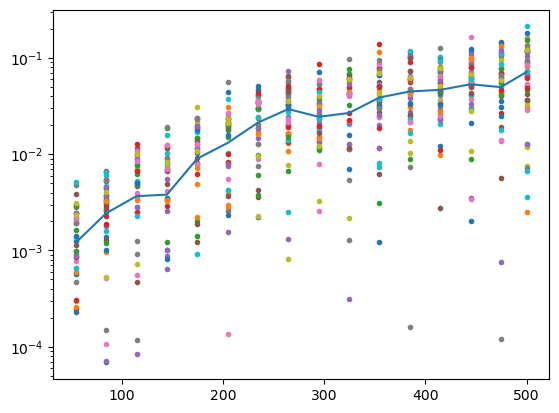

In [13]:
plt.figure()
for i in range(map_dict['Dl'].shape[0]):
    # a=1
    plt.semilogy(ell,map_dict['Dl'][i,0,:]-map_dict['Dl_1x1'][i,:],'.')
    # plt.semilogy(ell,map_dict['Dl'][i,0,:],'.')
    # plt.semilogy(ell,map_dict['Dl_1x1'][i,:],'.')
    # plt.semilogy(ell,map_dict['Dl'][i,1,:],'.')
    # plt.semilogy(ell,map_dict['Dl_2x2'][i,:],'.')

#     plt.loglog(map_dict['ell'],np.abs(map_dict['Dl_2x2'][i,:]))
# plt.loglog(map_dict['ell'],map_dict['Dl'][i,0,:])
# plt.figure()
# plt.loglog(map_dict['ell'],map_dict['Dl'][6,0,:])
print(map_dict['Dl_1x1'].shape)

mean = np.mean(map_dict['Dl'][:,0,:]-map_dict['Dl_1x1'][:,:],axis=0)
# mean_bis = np.mean(map_dict['Dl'][:,0,:]-np.mean(map_dict['Dl_1x1'][:,:],axis=0),axis=0)
mean_0 = np.mean(map_dict['Dl'][:,0,:],axis=0)
mean_1 = np.mean(map_dict['Dl'][:,1,:],axis=0)
mean_n11 = np.mean(map_dict['Dl_1x1'][:,:],axis=0)
mean_n22 = np.mean(map_dict['Dl_2x2'][:,:],axis=0)
# print(mean_0.shape)
# print(mean_1.shape)
plt.semilogy(ell,mean)
# plt.semilogy(ell,mean_bis)
# plt.semilogy(ell,mean_0)
# plt.semilogy(ell,mean_n11)
# plt.semilogy(ell,mean_1)
# plt.semilogy(ell,mean_n22)
# plt.show()